In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_df=pd.read_csv('car_details.csv')

In [4]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_df.shape

(4340, 8)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
car_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**EDA**

- Distribution of the target variable(selling_price)

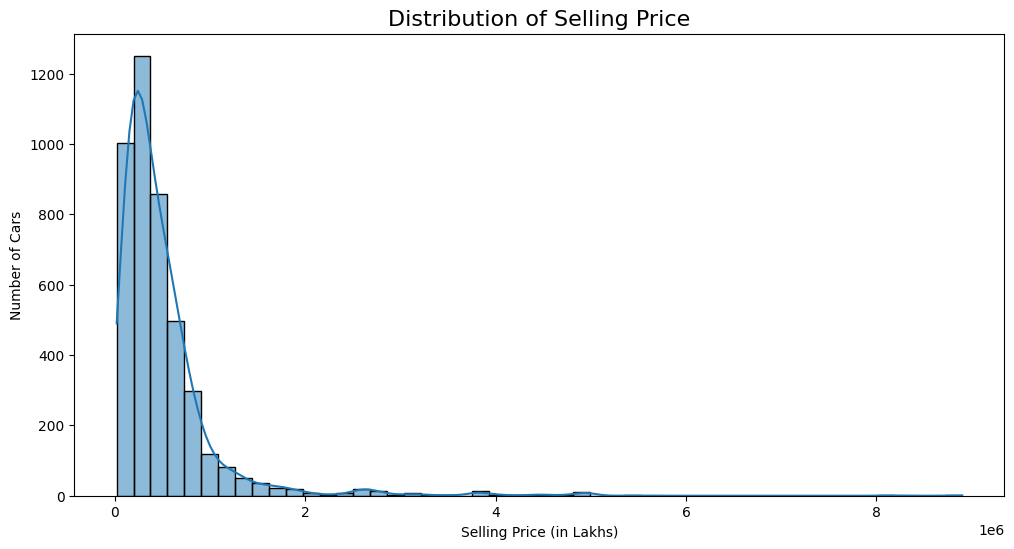

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(car_df['selling_price'],kde=True,bins=50)
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Number of Cars')
plt.show()

- Analysis of Categorical Features

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'CNG'),
  Text(3, 0, 'LPG'),
  Text(4, 0, 'Electric')])

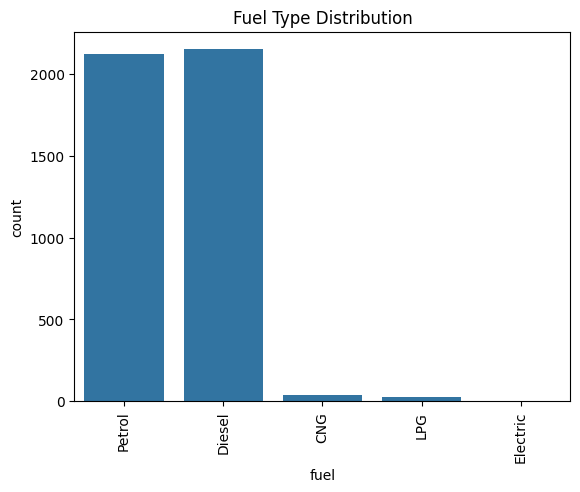

In [21]:
#Fuel Type
sns.countplot(x='fuel',data=car_df)
plt.title('Fuel Type Distribution')
plt.xticks(rotation='vertical')

([0, 1, 2],
 [Text(0, 0, 'Individual'),
  Text(1, 0, 'Dealer'),
  Text(2, 0, 'Trustmark Dealer')])

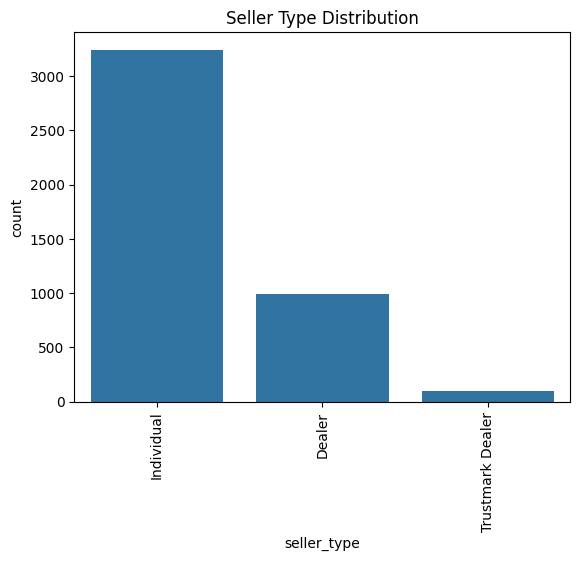

In [22]:
#Seller Type
sns.countplot(x='seller_type',data=car_df)
plt.title('Seller Type Distribution')
plt.xticks(rotation='vertical')

([0, 1], [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

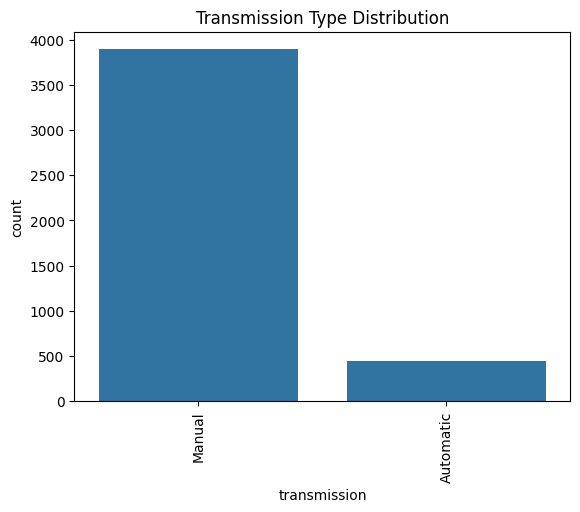

In [23]:
#Transmission Type
sns.countplot(x='transmission',data=car_df)
plt.title('Transmission Type Distribution')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Fourth & Above Owner'),
  Text(3, 0, 'Third Owner'),
  Text(4, 0, 'Test Drive Car')])

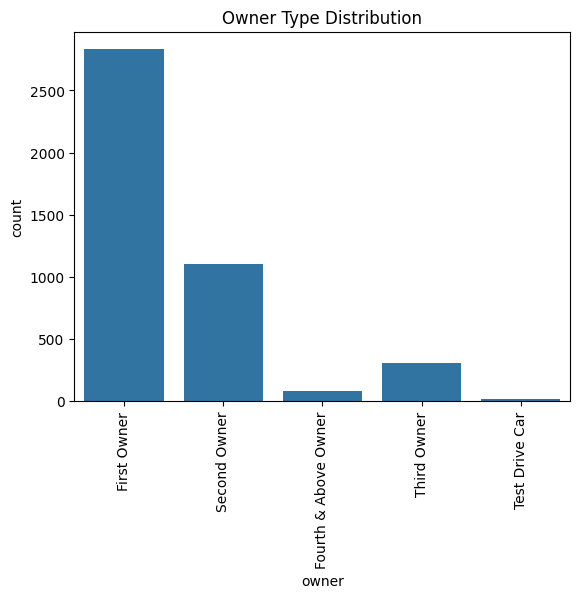

In [24]:
#Owner Type
sns.countplot(x='owner',data=car_df)
plt.title('Owner Type Distribution')
plt.xticks(rotation='vertical')

- Relationship between Features and Price

In [25]:
car_df['car_age']=2025-car_df['year']

Pairplot of Numerical Features


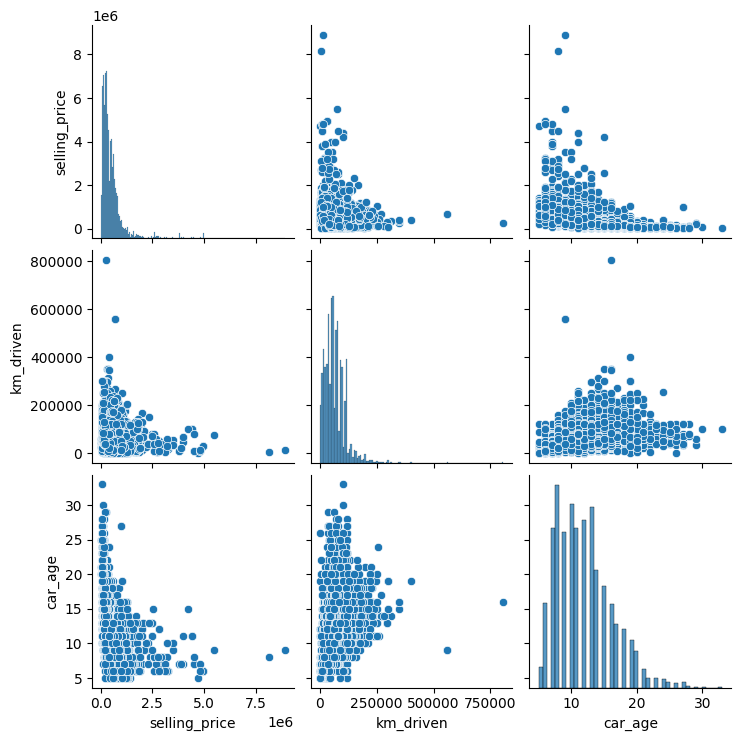

In [26]:
print('Pairplot of Numerical Features')
sns.pairplot(car_df[['selling_price','km_driven','car_age']])
plt.show()

In [ ]:
#correlation heatmap

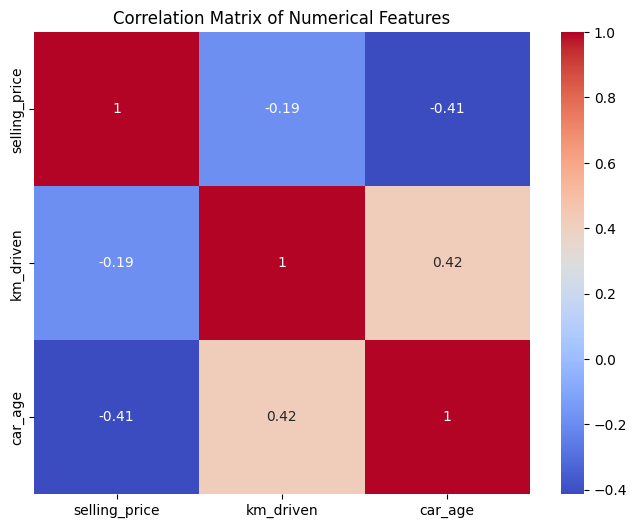

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(car_df[['selling_price','km_driven','car_age']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Data Cleaning & Feature Engineering**

In [28]:
car_df['brand']=car_df['name'].str.split().str[0]

In [29]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,16,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,9,Hyundai


In [30]:
cleaned_df=car_df.drop(columns=['name','year'])

In [31]:
cleaned_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda


In [39]:
# To avoid a 'division by zero' error for brand new cars (age 0), we'll replace age 0 with 1.
cleaned_df['car_age_safe']=cleaned_df['car_age'].replace(0,1)
cleaned_df['km_per_year']=cleaned_df['km_driven']/cleaned_df['car_age_safe']

In [40]:
cleaned_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand,car_age_safe,km_per_year
0,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,18,3888.888889
1,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,18,2777.777778
2,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,13,7692.307692
3,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,8,5750.000000
4,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,11,12818.181818


In [41]:
cleaned_df.drop(columns=['car_age_safe','km_driven'],inplace=True)

In [42]:
cleaned_df.head()

,selling_price,fuel,seller_type,transmission,owner,car_age,brand,km_per_year
0,60000,Petrol,Individual,Manual,First Owner,18,Maruti,3888.888889
1,135000,Petrol,Individual,Manual,First Owner,18,Maruti,2777.777778
2,600000,Diesel,Individual,Manual,First Owner,13,Hyundai,7692.307692
3,250000,Petrol,Individual,Manual,First Owner,8,Datsun,5750.000000
4,450000,Diesel,Individual,Manual,Second Owner,11,Honda,12818.181818


**One hot Encoding**

In [43]:
final_df=pd.get_dummies(cleaned_df,drop_first=True)

In [44]:
final_df.head()

,selling_price,car_age,km_per_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,18,3888.888889,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,135000,18,2777.777778,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,600000,13,7692.307692,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,250000,8,5750.000000,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,450000,11,12818.181818,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


**Model Training**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [45]:
X=final_df.drop(columns=['selling_price'])
y=final_df['selling_price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models= {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [48]:
for name,model in models.items():
    print(f"---Training {name} ---")
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    print(f"R-Squared (R^2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f} (Lakhs)")
    print("-"*30 +"\n")

---Training Linear Regression ---
R-Squared (R^2): 0.5299
Mean Absolute Error (MAE): 184833.05 (Lakhs)
------------------------------

---Training Random Forest ---
R-Squared (R^2): 0.7586
Mean Absolute Error (MAE): 115952.38 (Lakhs)
------------------------------

---Training XGBoost ---
R-Squared (R^2): 0.7567
Mean Absolute Error (MAE): 119416.22 (Lakhs)
------------------------------



In [49]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid={
    'n_estimators':[50,100,150,200],
    'max_depth':[5,10,15,16,18,20,30],
    'min_samples_split':[2,10,15]
}

In [76]:
grid_search=GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

In [77]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 16, 18, 20, 30],
                         'min_samples_split': [2, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [78]:
best_params=grid_search.best_params_

In [79]:
best_params

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}

In [80]:
grid_search.best_score_

np.float64(0.7964376263647452)

In [81]:
best_model=grid_search.best_estimator_
final_pred=best_model.predict(X_test)
final_r2=r2_score(y_test,final_pred)
print(f"\n The final R-squared score on the test data is:{final_r2:.4f}")


 The final R-squared score on the test data is:0.7588


In [83]:
import pickle

final_model=RandomForestRegressor(random_state=42, **best_params)
final_model.fit(X,y)

pickle.dump(final_model,open('car_price_model.pkl','wb'))

pickle.dump(final_df,open('car_data.pkl','wb'))